In [25]:
# Change to Fork version of Pulser
import sys
sys.path.append('C:/Users/J64Th/Stage 3A - Jupyter/seb fork/Pulser')

In [26]:
from pulser import Register, Pulse, Sequence, Simulation
from pulser.devices import Chadoq2
from pulser.waveforms import ConstantWaveform, RampWaveform

import numpy as np
import matplotlib.pyplot as plt
import qutip

## Single Atom

Prepare a single atom:

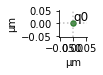

In [27]:
reg = Register.from_coordinates([(0,0)], prefix='q')
reg.draw()

Act on this atom with a Constant Pulse (a $2\pi$-pulse), such that it oscillates towards the excited Rydberg state and back to the original state:

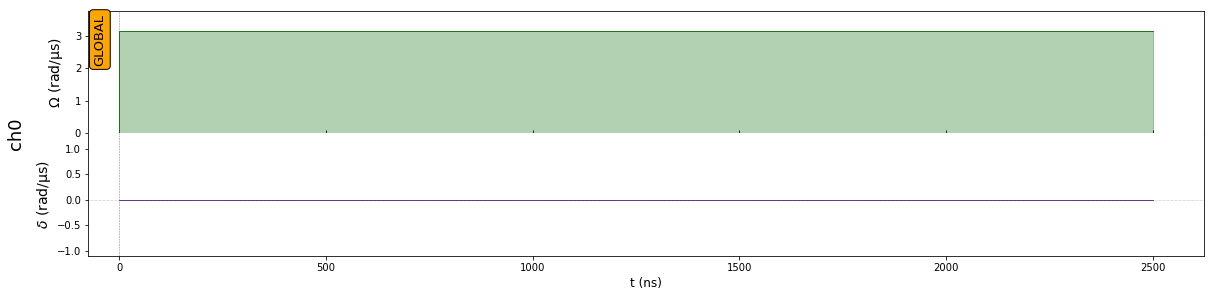

In [28]:
seq = Sequence(reg, Chadoq2)
seq.declare_channel('ch0', 'rydberg_global', 'q1')
duration = 2500
pulse = Pulse.ConstantPulse(duration, np.pi, 0.*2*np.pi, 0)
seq.add(pulse, 'ch0')
seq.draw()

In [29]:
sim = Simulation(seq, sampling_rate=0.1)
res = sim.run()

In [30]:
obs = qutip.tensor(qutip.qeye(2),
                   qutip.basis(2,0).proj(),
                   qutip.qeye(2),
                   qutip.qeye(2)) # |r><r|

obs = qutip.basis(2,0).proj()

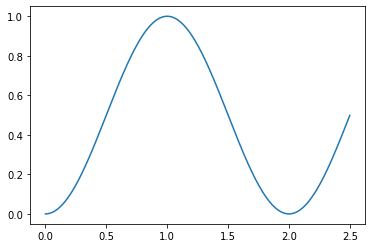

In [31]:
clean = res.expect([obs])[0]
plt.plot(sim._times, clean)

Now add SPAM errors to the simulation:

In [32]:
sim.remove_all_noise()
sim.add_noise('SPAM')

In [33]:
sim._noise

['SPAM']

In [34]:
sim.spam_dict

{'eta': 0.005, 'epsilon': 0.01, 'epsilon_prime': 0.05}

In [35]:
sim.show_config()

{'eval_t': -1, 'runs': 1, 'samples_per_run': 10, 'initial_state': Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[0.]
 [1.]]}


In [36]:
sim.config('runs', 20)
sim.config('samples_per_run', 10)
sim.show_config()

{'eval_t': -1, 'runs': 20, 'samples_per_run': 10, 'initial_state': Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[0.]
 [1.]]}


In [37]:
res = sim.run()

The new `res` instance has similar methods to the usual `SimResults` object. For example, we can calculate expectation values:

In [38]:
res.expect([obs])[0]

0.455

Notice that by default the answer corresponds only to the final state of the evolution. To study the full-time dynamics with error, we indicate a specific time in the evolution with the parameter `t`.

Let us now create a function that evaluates noisy evolution for the entire time list of the simulation, and which can accept also a dictionary of SPAM parameters, `spam_dict`:

In [67]:
# Store original time list:
t_list = sim._times
sim.config('runs', 60)
sim.config('samples_per_run', 10)
sim.remove_all_noise()
sim.add_noise('SPAM')
sim.init_spam()
sim.show_config()

{'eval_t': 249, 'runs': 60, 'samples_per_run': 10, 'initial_state': Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[0.]
 [1.]]}


In [68]:
def spam_evolution(**spam_param):
    occup = []
    for i, time in enumerate(t_list):
        print(f't={time} µs...')
        sim.config('eval_t', i)
        sim.set_spam(**spam_param)
        res = sim.run()
        occup.append(res.expect([obs])[0])
    return occup

In [69]:
noisy = spam_evolution(eta=0.4)

t=0.0 µs...
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
t=0.01 µs...
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
t=0.02 µs...
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
t=0.03 µs...
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
t=0.04 µs...
faulty q0
faulty q0
faulty q0
faulty

faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
t=0.321 µs...
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
t=0.331 µs...
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
t=0.341 µs...
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
t=0.351 µs...
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faul

faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
t=0.642 µs...
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
t=0.652 µs...
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
t=0.662 µs...
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
t=0.672 µs...
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faul

faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
t=0.973 µs...
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
t=0.983 µs...
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
t=0.993 µs...
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
t=1.003 µs...
faulty q0
faulty q0
faulty q0
faulty q0
faul

faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
t=1.284 µs...
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
t=1.294 µs...
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
t=1.304 µs...
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
t=1.314 µs...
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faul

faulty q0
faulty q0
faulty q0
t=1.605 µs...
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
t=1.615 µs...
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
t=1.625 µs...
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
t=1.635 µs...
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faul

faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
t=1.936 µs...
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
t=1.947 µs...
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
t=1.957 µs...
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q

faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
t=2.248 µs...
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
t=2.258 µs...
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
t=2.268 µs...
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
t=2.278 µs...
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faul

Compare both clean and noisy simulations for the defaul SPAM parameters (taken from PRA_ARTICLE SPAM errors characterization)

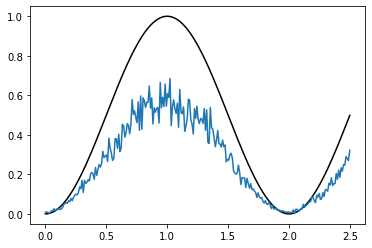

In [70]:
plt.plot(t_list, clean, 'k')
plt.plot(t_list, noisy)

Change the *SPAM* dictionary:

In [57]:
sim.set_spam(eta=0.005, epsilon=.99)
res_spam = sim.run()
res_spam.expect([obs])[0]

0.98

### Changing $\eta$

In [ ]:
#plt.figure(figsize=(10,5))
#plt.plot(sim._times[::8], clean)
for eta in np.linspace(0,1,6):
    plt.plot(t_list, spam_evolution(eta=eta, epsilon=0, epsilon_prime=0), label=f'eta = {eta}')
plt.legend()

t=0.0 µs...
t=0.01 µs...
t=0.02 µs...
t=0.03 µs...
t=0.04 µs...
t=0.05 µs...
t=0.06 µs...
t=0.07 µs...
t=0.08 µs...
t=0.09 µs...
t=0.1 µs...
t=0.11 µs...
t=0.12 µs...
t=0.13 µs...
t=0.14 µs...
t=0.15 µs...
t=0.16 µs...
t=0.17 µs...
t=0.18 µs...
t=0.19 µs...
t=0.2 µs...
t=0.21 µs...
t=0.22 µs...
t=0.23 µs...
t=0.24 µs...
t=0.25 µs...
t=0.26 µs...
t=0.27 µs...
t=0.281 µs...
t=0.291 µs...
t=0.301 µs...
t=0.311 µs...
t=0.321 µs...
t=0.331 µs...
t=0.341 µs...
t=0.351 µs...
t=0.361 µs...
t=0.371 µs...
t=0.381 µs...
t=0.391 µs...
t=0.401 µs...
t=0.411 µs...
t=0.421 µs...
t=0.431 µs...
t=0.441 µs...
t=0.451 µs...
t=0.461 µs...
t=0.471 µs...
t=0.481 µs...
t=0.491 µs...
t=0.501 µs...
t=0.511 µs...
t=0.521 µs...
t=0.531 µs...
t=0.541 µs...
t=0.551 µs...
t=0.562 µs...
t=0.572 µs...
t=0.582 µs...
t=0.592 µs...
t=0.602 µs...
t=0.612 µs...
t=0.622 µs...
t=0.632 µs...
t=0.642 µs...
t=0.652 µs...
t=0.662 µs...
t=0.672 µs...
t=0.682 µs...
t=0.692 µs...
t=0.702 µs...
t=0.712 µs...
t=0.722 µs...
t=0.732 µ

faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
t=0.351 µs...
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
t=0.361 µs...
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
t=0.371 µs...
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
t=0.381 µs...
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
t=0.391 µs...
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
t=0.401 µs...
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
t=0.411 µs...
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
fa

faulty q0
faulty q0
faulty q0
faulty q0
t=0.943 µs...
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
t=0.953 µs...
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
t=0.963 µs...
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
t=0.973 µs...
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
t=0.983 µs...
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
t=0.993 µs...
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
t=1.003 µs...
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
t=1.013 µs...
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
t=1.023 µs...
faulty q0
faulty q0
faul

faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
t=1.595 µs...
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
t=1.605 µs...
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
t=1.615 µs...
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
t=1.625 µs...
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
t=1.635 µs...
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
t=1.645 µs...
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
t=1.655 µs...
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
t=1.666 µs..

faulty q0
t=2.197 µs...
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
t=2.207 µs...
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
t=2.217 µs...
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
t=2.228 µs...
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
t=2.238 µs...
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
t=2.248 µs...
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
t=2.258 µs...
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
t=2.268 µs...
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q

faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
t=0.17 µs...
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
t=0.18 µs...
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
t=0.19 µs...
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
t=0.2 µs...
faulty q0
faulty q0
faulty q0
faulty q0

faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
t=0.491 µs...
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
t=0.501 µs...
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
t=0.511 µs...
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q

t=0.812 µs...
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
t=0.822 µs...
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
t=0.833 µs...
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
t=0.843 µs...
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faul

faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
t=1.154 µs...
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
t=1.164 µs...
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
t=1.174 µs...
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q

As $\eta$ grows, more qubits are not well-prepared and we stop seeing occupations at all.

### Changing $\epsilon$

t=0.0 µs...
t=0.105 µs...
t=0.21 µs...
t=0.315 µs...
t=0.42 µs...
t=0.526 µs...
t=0.631 µs...
t=0.736 µs...
t=0.841 µs...
t=0.946 µs...
t=1.052 µs...
t=1.157 µs...
t=1.262 µs...
t=1.367 µs...
t=1.472 µs...
t=1.578 µs...
t=1.683 µs...
t=1.788 µs...
t=1.893 µs...
t=1.999 µs...
t=0.0 µs...
t=0.105 µs...
t=0.21 µs...
t=0.315 µs...
t=0.42 µs...
t=0.526 µs...
t=0.631 µs...
t=0.736 µs...
t=0.841 µs...
t=0.946 µs...
t=1.052 µs...
t=1.157 µs...
t=1.262 µs...
t=1.367 µs...
t=1.472 µs...
t=1.578 µs...
t=1.683 µs...
t=1.788 µs...
t=1.893 µs...
t=1.999 µs...
t=0.0 µs...
t=0.105 µs...
t=0.21 µs...
t=0.315 µs...
t=0.42 µs...
t=0.526 µs...
t=0.631 µs...
t=0.736 µs...
t=0.841 µs...
t=0.946 µs...
t=1.052 µs...
t=1.157 µs...
t=1.262 µs...
t=1.367 µs...
t=1.472 µs...
t=1.578 µs...
t=1.683 µs...
t=1.788 µs...
t=1.893 µs...
t=1.999 µs...
t=0.0 µs...
t=0.105 µs...
t=0.21 µs...
t=0.315 µs...
t=0.42 µs...
t=0.526 µs...
t=0.631 µs...
t=0.736 µs...
t=0.841 µs...
t=0.946 µs...
t=1.052 µs...
t=1.157 µs...
t=1.262 

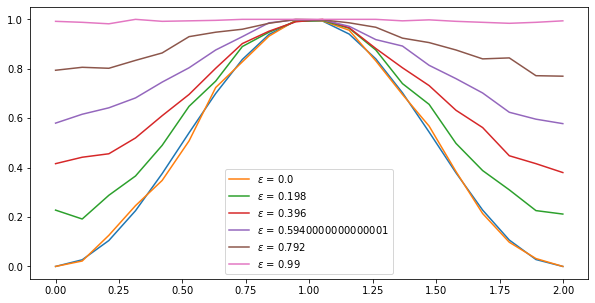

In [21]:
plt.figure(figsize=(10,5))
plt.plot(sim._times, clean)
for epsilon in np.linspace(0,.99,6):
    plt.plot(sim._times, spam_evolution(eta=0, epsilon=epsilon, epsilon_prime=0),
             label=rf'$\epsilon$ = {epsilon}')
plt.legend()

As more false negatives appear, it looks like the system is never captured, so always in a Rydberg state

### Changing $\epsilon'$

t=0.0 µs...
t=0.105 µs...
t=0.21 µs...
t=0.315 µs...
t=0.42 µs...
t=0.526 µs...
t=0.631 µs...
t=0.736 µs...
t=0.841 µs...
t=0.946 µs...
t=1.052 µs...
t=1.157 µs...
t=1.262 µs...
t=1.367 µs...
t=1.472 µs...
t=1.578 µs...
t=1.683 µs...
t=1.788 µs...
t=1.893 µs...
t=1.999 µs...
t=0.0 µs...
t=0.105 µs...
t=0.21 µs...
t=0.315 µs...
t=0.42 µs...
t=0.526 µs...
t=0.631 µs...
t=0.736 µs...
t=0.841 µs...
t=0.946 µs...
t=1.052 µs...
t=1.157 µs...
t=1.262 µs...
t=1.367 µs...
t=1.472 µs...
t=1.578 µs...
t=1.683 µs...
t=1.788 µs...
t=1.893 µs...
t=1.999 µs...
t=0.0 µs...
t=0.105 µs...
t=0.21 µs...
t=0.315 µs...
t=0.42 µs...
t=0.526 µs...
t=0.631 µs...
t=0.736 µs...
t=0.841 µs...
t=0.946 µs...
t=1.052 µs...
t=1.157 µs...
t=1.262 µs...
t=1.367 µs...
t=1.472 µs...
t=1.578 µs...
t=1.683 µs...
t=1.788 µs...
t=1.893 µs...
t=1.999 µs...
t=0.0 µs...
t=0.105 µs...
t=0.21 µs...
t=0.315 µs...
t=0.42 µs...
t=0.526 µs...
t=0.631 µs...
t=0.736 µs...
t=0.841 µs...
t=0.946 µs...
t=1.052 µs...
t=1.157 µs...
t=1.262 

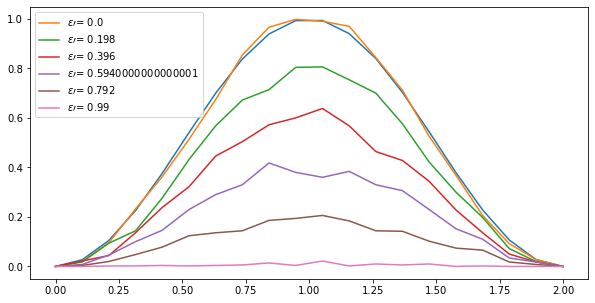

In [22]:
plt.figure(figsize=(10,5))
plt.plot(sim._times, clean)
for eps_pr in np.linspace(0,.99,6):
    plt.plot(sim._times, spam_evolution(eta=0, epsilon=0, epsilon_prime=eps_pr),
             label=rf'$\epsilon\prime$= {eps_pr}')
plt.legend()

As there are more false positives, all atoms seem to be recaptured, until no occupation is detected

## Doppler Noise

We can add Doppler Noise to our simulation with the `add_noise('doppler')` method. Let's increase the number of runs in order to get smoother curves.

In [64]:
sim.config('runs', 30)
sim.config('samples_per_run', 10)
sim.remove_all_noise()
sim.add_noise('doppler')

In [65]:
def doppler_evolution():
    occup = []
    for i, time in enumerate(t_list):
        print(f't={time} µs...')
        sim.config('eval_t', i)
        res = sim.run()
        occup.append(res.expect([obs])[0])
    return occup

t=0.0 µs...
t=0.01 µs...
t=0.02 µs...
t=0.03 µs...
t=0.04 µs...
t=0.05 µs...
t=0.06 µs...
t=0.07 µs...
t=0.08 µs...
t=0.09 µs...
t=0.1 µs...
t=0.11 µs...
t=0.12 µs...
t=0.13 µs...
t=0.14 µs...
t=0.15 µs...
t=0.16 µs...
t=0.17 µs...
t=0.18 µs...
t=0.19 µs...
t=0.2 µs...
t=0.21 µs...
t=0.22 µs...
t=0.23 µs...
t=0.24 µs...
t=0.25 µs...
t=0.26 µs...
t=0.27 µs...
t=0.281 µs...
t=0.291 µs...
t=0.301 µs...
t=0.311 µs...
t=0.321 µs...
t=0.331 µs...
t=0.341 µs...
t=0.351 µs...
t=0.361 µs...
t=0.371 µs...
t=0.381 µs...
t=0.391 µs...
t=0.401 µs...
t=0.411 µs...
t=0.421 µs...
t=0.431 µs...
t=0.441 µs...
t=0.451 µs...
t=0.461 µs...
t=0.471 µs...
t=0.481 µs...
t=0.491 µs...
t=0.501 µs...
t=0.511 µs...
t=0.521 µs...
t=0.531 µs...
t=0.541 µs...
t=0.551 µs...
t=0.562 µs...
t=0.572 µs...
t=0.582 µs...
t=0.592 µs...
t=0.602 µs...
t=0.612 µs...
t=0.622 µs...
t=0.632 µs...
t=0.642 µs...
t=0.652 µs...
t=0.662 µs...
t=0.672 µs...
t=0.682 µs...
t=0.692 µs...
t=0.702 µs...
t=0.712 µs...
t=0.722 µs...
t=0.732 µ

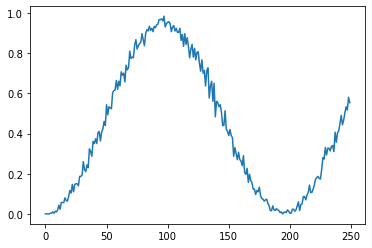

In [66]:
plt.plot(doppler_evolution())

## Multiple Atoms

We add the SPAM errors into the AFM state preparation sequence:

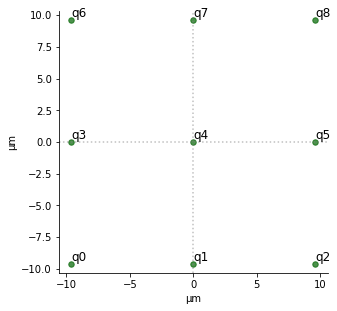

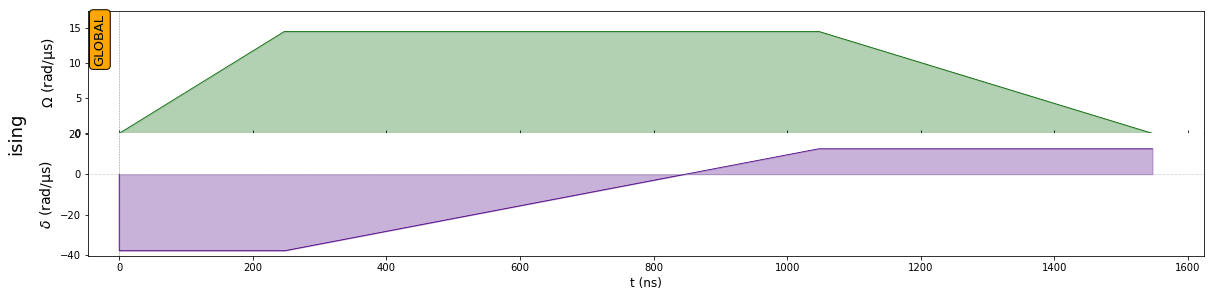

In [34]:
# Parameters in rad/µs and ns
Omega_max = 2.3 * 2*np.pi 
U = Omega_max / 2.3
delta_0 = -6 * U
delta_f = 2 * U
t_rise = 250
t_fall = 500
t_sweep = (delta_f - delta_0)/(2 * np.pi * 10) * 1000
R_interatomic = Chadoq2.rydberg_blockade_radius(U)

N_side = 3
reg = Register.rectangle(N_side, N_side, R_interatomic, prefix='q')

rise = Pulse.ConstantDetuning(RampWaveform(t_rise, 0., Omega_max), delta_0, 0.)
sweep = Pulse.ConstantAmplitude(Omega_max, RampWaveform(t_sweep, delta_0, delta_f), 0.)
fall = Pulse.ConstantDetuning(RampWaveform(t_fall, Omega_max, 0.), delta_f, 0.)

seq = Sequence(reg, Chadoq2)
seq.declare_channel('ising', 'rydberg_global')

seq.add(rise, 'ising')
seq.add(sweep, 'ising')
seq.add(fall, 'ising')

reg.draw()
seq.draw()

In [45]:
simul = Simulation(seq, sampling_rate=0.05)
clean_results = simul.run()
simul.add_noise('SPAM')
simul.config('runs', 50)
simul.config('samples_per_run', 1000)
simul.init_spam()
spam_results = simul.run()

faulty q6
faulty q6
faulty q6


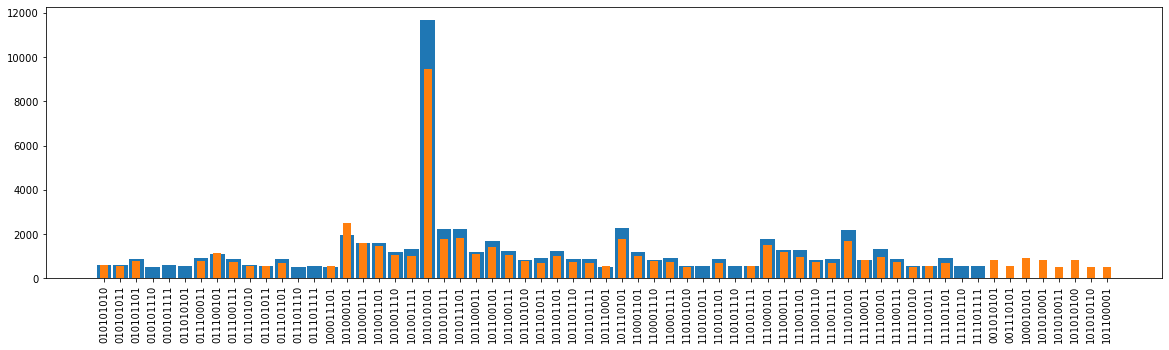

In [46]:
plt.figure(figsize=(20,5))

spam_count = spam_results.sample_final_state(meas_basis='ground-rydberg', N_samples=1e5)
clean_count = clean_results.sample_final_state(meas_basis='ground-rydberg', N_samples=1e5)

clean_most_freq = {k:v for k,v in clean_count.items() if v>500}
spam_most_freq = {k:v for k,v in spam_count.items() if v>500}

plt.bar(list(clean_most_freq.keys()), list(clean_most_freq.values()), width=0.9)
plt.bar(list(spam_most_freq.keys()), list(spam_most_freq.values()), width=0.5)

plt.xticks(rotation='vertical')
plt.show()

In [ ]:
def f(**kwargs):
    return kwargs['eta']
f(eta=5, mu=3)

In [16]:
t=[1,2,3,4,5,6]
t[::5]

[1, 6]